# Introduction

Since Second Year in  my Bachelor's Degree, I have been fascinated by the topic of **Machine Learning**. This kernel is prepared to be a container of many broad topics in the field of Machine Learning. My motive is to make this the ultimate reference to Machine Learning for beginners and experienced people alike.

<img src='https://www.aurecongroup.com/-/media/images/aurecon/content/expertise/digital-engineering-advisory/machine-learning/aurecon-machine-learning-large-banner.jpg?w=1170&h=417&as=1&crop=1'>

## Some important things :
* This kernel is a work in progress so every time you see on your home feed and open it, you will surely find fresh content.
* I am doing this only after completing various courses in this field. I continue to study more advanced concepts to provide more knowledge and content.
* If there is any suggestion or any specific topic you would like me to cover, kindly mention that in the comments.
* **If you like my work, be sure to upvote this kernel** so it looks more relevant and meaningful to the community.

<a id="000"></a><br>

### CONTENT

*  [REGRESSION ALGORITHMS](#1)
    1. [Exploratory Data Analysis](#1.0)
    1. [Simple Linear Regression](#1.1)
    1. [Multiple Linear Regression](#1.2)
    1. [Polynomial Regression](#1.3)
    1. [Decision Tree Regression](#1.4)
    1. [SVM Regression](#1.5)
    1. [XGboost Regression](#1.6)
    1. [Lasso Regression](#1.7)
<br>
<br>

*  [CLASSIFICATION ALGORITHMS](#2)
    1. [Exploratory Data Analysis](#2.0)
    1. [Decision Tree Classification](#2.1)
    1. [Random Forest Classification](#2.2)
    1. [Logistic Regression](#2.3)
    1. [K-Nearest Neighbor Classification](#2.4)
    1. [Naive Bayes Classification](#2.5)
    1. [SVM Classification](#2.6)
    1. [Nu-Support Vector Classification](#2.7)
    1. [Linear Support Vector Classification](#2.8)
    1. [Gradient Boosting Classifier](#2.9)
* [End Of Notebook](#100)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd #data processing, CSV File(I/O)
import numpy as np #linear algebra

#Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") # ignore warnings


from sklearn.metrics import classification_report #Build a text report showing the classification metrics.
from sklearn.metrics import accuracy_score #Accuracy classification score.
from sklearn.metrics import confusion_matrix #Compute confusion matrix to evaluate the accuracy of a classification.

# REGRESSION ALGORITHMS

In [ ]:
#Read CSV file into data for applying Regression Algorithms
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

<a id="1.0"></a><br>
# 0.EDA On King County House Sale Data

In [ ]:
# to see features and target variable
df.head()

In [ ]:
r,c = df.shape
print("Data has ",r," Rows")
print("Data has ",c," Columns")

In [ ]:
# Well know question is is there any NaN value and length of this data so lets look at info
df.info()

As you can see:
 * > Length: 21613 (range index)
 * > Features are int and float except for Date which is object
 * > Target variable(PRICE) is float.

In [ ]:
# for statistical analysis
df.describe()

In [ ]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Attributes Correlation",fontsize=30)
plt.show()

In [ ]:
#Plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
hist1 = [go.Histogram(x=df.grade,marker=dict(color='rgb(102, 0, 102)'))]

histlayout1 = go.Layout(title="Grade Counts of Houses",xaxis=dict(title="Grades"),yaxis=dict(title="Counts"))

histfig1 = go.Figure(data=hist1,layout=histlayout1)

iplot(histfig1)

In [ ]:
hist2 = [go.Histogram(x=df.yr_built,xbins=dict(start=np.min(df.yr_built),size=1,end=np.max(df.yr_built)),marker=dict(color='rgb(0,102,0)'))]

histlayout2 = go.Layout(title="Built Year Counts of Houses",xaxis=dict(title="Years"),yaxis=dict(title="Built Counts"))

histfig2 = go.Figure(data=hist2,layout=histlayout2)

iplot(histfig2)

In [ ]:
v1 = [go.Box(y=df.price,name="Price Distribution of Houses",marker=dict(color="rgba(64,64,64,0.9)"),hoverinfo="name+y")]

layout1 = go.Layout(title="Price")

fig1 = go.Figure(data=v1,layout=layout1)
iplot(fig1)

In [ ]:
v21 = [go.Box(y=df.bedrooms,name="Bedrooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
v22 = [go.Box(y=df.bathrooms,name="Bathrooms",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
v23 = [go.Box(y=df.floors,name="Floors",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]

layout2 = go.Layout(title="Bedrooms,Bathrooms and Floors",yaxis=dict(range=[0,13])) #I hate 33 bedroom

fig2 = go.Figure(data=v21+v22+v23,layout=layout2)
iplot(fig2)

In [ ]:
df["color"] = ""
df.color[df.grade == 1] = "rgb(255,255,255)"
df.color[df.grade == 2] = "rgb(220,220,220)"
df.color[df.grade == 3] = "rgb(242, 177, 172)"
df.color[df.grade == 4] = "rgb(255,133,27)"
df.color[df.grade == 5] = "rgb(255,255,204)"
df.color[df.grade == 6] = "rgb(255,65,54)"
df.color[df.grade == 7] = "rgb(178,37,188)"
df.color[df.grade == 8] = "rgb(51,51,0)"
df.color[df.grade == 9] = "rgb(37,188,127)"
df.color[df.grade == 10] = "rgb(26,51,176)"
df.color[df.grade == 11] = "rgb(132,10,10)"
df.color[df.grade == 12] = "rgb(82,80,80)"
df.color[df.grade == 13] = "rgb(0,0,0)"

In [ ]:
#slice +7 grade
dataplus = df[np.logical_and(df.grade >= 7,df.yr_built >= 2000)] 
#list lat and long
lats = list(dataplus.lat.values)
longs = list(dataplus.long.values)

In [ ]:
mapbox_access_token = 'pk.eyJ1IjoiZGFya2NvcmUiLCJhIjoiY2pscGFheHA1MXdqdjNwbmR3c290MTZ6dCJ9.K1FMv_q3ZVlKP13RrjFkjg'

mapp = [go.Scattermapbox(lat=lats,lon=longs,mode="markers",marker=dict(size=4.5,color=dataplus["color"]) ,hoverinfo="text",text="Grade:"+dataplus.grade.apply(str)+" Built Year:"+dataplus.yr_built.apply(str)+" Price:"+dataplus.price.apply(str))]

layout5 = dict(title=" Houses with Grade(7+) & Built Year(>2000) distribution on Map",width=900,height=750,hovermode="closest",mapbox=dict(bearing=0,pitch=0,zoom=9,center=dict(lat=47.5,lon=-122.161),accesstoken=mapbox_access_token))

fig5 = go.Figure(data=mapp,layout=layout5)

iplot(fig5)

<a id="1.1"></a><br>
# 1. Simple Linear Regression

Simple Linear regression is a basic and commonly used type of predictive analysis.
* Have only one feature and one target variable.
* Supervised learning.
* We have converted 3 Species into Numerical Values. This will enable us to apply Linear Regression to given Data.
* **y = ax + b** where y = target, x = feature and a = parameter of model
* In regression problems target value is continuously varying variable such as price of house or sacral_slope.

In [ ]:
X = df[['sqft_living15']]
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

#Fit
modelLR.fit(X_train, y_train)

#Predict
Y_pred = modelLR.predict(X_test)

modelLR.score(X_test,y_test)

<a id="1.2"></a><br>
# 2. Multiple Linear Regression

Multiple Linear regression is a basic and commonly used type of predictive analysis.
* Have **Multiple features** and one target variable.
* The goal of multiple regression is to **model the linear relationship between your independent variables and your dependent variable**.

In [ ]:
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']] #Selecting Relevant Features
X = new_df.values #Features
y = df.price.values #Target

from sklearn.model_selection import train_test_split #To split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

#Fit
modelLR.fit(X_train, y_train)
#Predict
Y_pred = modelLR.predict(X_test)

modelLR.score(X_test,y_test)

<a id="1.3"></a><br>
# 3. Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.
* In many cases, linear model will not work out. For example if we analyzing the production of chemical synthesis in terms of temperature at which the synthesis take place in such cases we use quadratic model.
                y = a + b1x + b2^2 + e

In [ ]:
X1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]  #Time on 24 hour clock
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100] #Speed of Cars 

mymodel = np.poly1d(np.polyfit(X1, y1, 3)) #Polynomial model using NumPy
myline = np.linspace(1, 22, 100)

plt.scatter(X1, y1)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
# Predict Speed at 17
speed = mymodel(17)
print(speed)

<a id="1.4"></a><br>
# 4. Decision Tree Regression

* Decision Trees are divided into Classification and Regression Trees.
* Regression trees are needed when the response variable is numeric or continuous. 
* Classification trees, as the name implies are used to separate the dataset into classes belonging to the response variable. 
* This piece explains a Decision Tree Regression Model practice with Python.

<table><tr><td><img src='https://miro.medium.com/max/1400/1*avwrArcpwud-MBTgf6n-qw.png'></td><td><img src='https://miro.medium.com/max/1400/1*XZ220vTa7rN8ccJZZNe09w.png'></td></tr></table>

In [ ]:
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

dtr.score(X_test,y_test)

<a id="1.5"></a><br>
# 5. Support Vector Regression

* Support Vector regression is a type of Support vector machine that supports linear and non-linear regression.
* In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold.
* As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations.
   * The violation concept in this example represents as ε (epsilon).
   
<img src="https://miro.medium.com/max/1260/1*25Kk53QBOpBie4_qMSTnAA.png">

In [ ]:
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

svr_linear.score(X_test,y_test)

<a id="1.6"></a><br>
# 6. XGboost Regression

* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
* In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.
  * However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.
 
<img src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg">

In [ ]:
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test,y_test)

<a id="1.7"></a><br>
# 7. Lasso Regression

* Lasso regression is a type of linear regression that uses shrinkage.
* Shrinkage is where data values are shrunk towards a central point, like the mean. 
* The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

<img src="https://miro.medium.com/proxy/1*QVzTd8Top6ImHR-3U3QdqQ.png">

In [ ]:
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha = 50)
clf.fit(X_train, y_train)
Y = clf.predict(X_test)
clf.score(X_test,y_test)

-------------------------------------------

<a id="2"></a><br>
# CLASSIFICATION ALGORITHMS

In [ ]:
# Read the Data for Classification Algorithms
data = pd.read_csv('../input/iris/Iris.csv')

<a id="2.0"></a><br>
# 0. EDA on Iris Flower Data

In [ ]:
# to see features and target variable
data.head()

In [ ]:
r,c = data.shape
print("Data has ",r," Rows")
print("Data has ",c," Columns")

In [ ]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

As you can see:
 * > Length: 150 (range index)
 * > Features are float except for Id which is integer
 * > Target variables are object that is like string

In [ ]:
# for statistical analysis
data.describe()

#### Scatter Plot: SepalWidth vs PetalWidth of different Species

In [ ]:
sns.FacetGrid(data, hue='Species', height=7)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

#### Countplot: of Flower Species

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x="Species", data=data)
data.loc[:,'Species'].value_counts()

#### Pairplot of Various attributes

In [ ]:
sns.pairplot(data, hue='Species')

In [ ]:
X = data.iloc[:,:-1].values #Feature Variables
y = data.iloc[:,-1].values #Target Variable

In [ ]:
#Splitting Feature and Target Variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a id="2.1"></a><br>
# 1. Decision Tree

* A decision tree is a **decision support tool** that uses a tree-like graph with model of decisions and their possible consequences.
* It is a way to display an algorithm **that only contains conditional control statements**.
* A decision tree is a **flowchart-like structure** in which :
  * each **internal node represents a “test” on an attribute** *(e.g. whether a coin flip comes up heads or tails)*,
  * each **branch represents the outcome of the test**,
  * and each **leaf node represents a class label** *(decision taken after computing all attributes)*.
  
<img src="https://miro.medium.com/max/820/0*LHzDR-s89Ggfqn7p.png">

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets #way to access preprovided data in sklearn

# Loading example data
iris = datasets.load_iris()
X1 = iris.data[:, [0, 2]] #Features
y1 = iris.target  #Target

In [ ]:
# Training a classifier
tree = DecisionTreeClassifier()
tree.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=tree, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree Classifier on Iris Dataset')
plt.show()


<a id="2.2"></a><br>
# 2. Random Forest

* The Random Forest Classifier is a set of decision trees from randomly selected subset of training set.
* It **aggregates the votes from different decision trees** to decide the final class of the test object.
* It is an ensemble tree-based learning algorithm.
    * Ensemble algorithms are those which combines more than one algorithms of same or different kind for classifying objects.
* It is one of the most accurate learning algorithms available. For many data sets, it produces a **highly accurate classifier**.
* It runs efficiently on large databases.
* It can handle **thousands of input variables** without variable deletion.

<img src='https://miro.medium.com/max/1200/1*5dq_1hnqkboZTcKFfwbO9A.png'>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
forest = RandomForestClassifier(max_depth=2)
forest.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=forest, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random Forest Classifier on Iris Dataset')
plt.show()


<a id="2.3"></a><br>
# 3. Logistic Regression

* Logistic Regression is used when the **dependent variable(target) is categorical**.
* For Example:
        * To predict whether an email is spam (1) or (0)
        * Whether the tumor is malignant (1) or not (0)
* Logistic regression is named for the function used at the core of the method, **the Logistic Function** (also called Sigmoid Function).
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
lr = LogisticRegression()
lr.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Logistic Regression Classifier on Iris Dataset')
plt.show()


<a id="2.4"></a><br>
# 4. K- Nearest Neighbor

* The KNN algorithm assumes that **similar things exist in close proximity**.
* In other words, similar things are near to each other.
        Birds of a feather flock together.
* KNN captures the **idea of similarity** (sometimes called distance, proximity, or closeness).
* KNN is used **for recommending products on Amazon, posts on Facebook, movies on Netflix, or videos on YouTube**.
* KNN can be used for both classification and regression predictive problems.
  * However, it is more widely used in classification problems in the industry.
  
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png">

In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('K-Nearest Neighbor Classifier on Iris Dataset')
plt.show()


<a id="2.5"></a><br>
# 5. Naive Bayes

* Naive Bayes is a **statistical classification technique** based on **Bayes Theorem**.
* Naive Bayes classifier assumes that the **effect of a particular feature in a class is independent of other features**.
* For example :- a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location.
  * Even if these features are interdependent, these **features are still considered independently**.
  * This assumption **simplifies computation**, and that's why it is considered as naive.
  * This assumption is called **class conditional independence**.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_4_lyi0ob.png">

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
nb = GaussianNB()
nb.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=nb, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Naive Bayes Classifier on Iris Dataset')
plt.show()


<a id="2.6"></a><br>
# 6. SVM

* The **goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes** so that we can easily put the new data point in the correct category in the future.
* This best decision boundary is called a **hyperplane**.
* The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as **Support Vector**.
* SVM algorithm can be used for Face detection, image classification, text categorization, etc.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png">

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
svm = SVC()
svm.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM Classifier on Iris Dataset')
plt.show()


<a id="2.7"></a><br>
# 7. Nu - Support Vector Classification

* It is like SVC but NuSVC accepts slightly different sets of parameters.
* The parameter which is different from SVC is as follows −
         nu − float, optional, default = 0.5
* It represents an **upper bound** on the fraction of training errors and a **lower bound** of the fraction of support vectors.
* Its value should be in the **interval of (o,1]**.

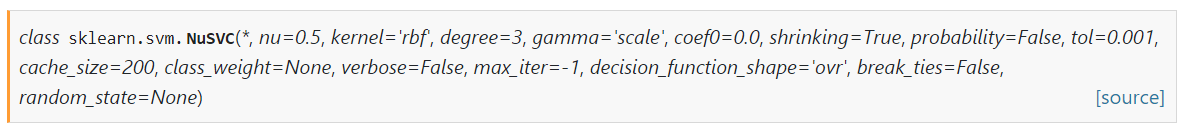

In [ ]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
NuSupport = NuSVC()
NuSupport.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=NuSupport, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Nu - Support Vector Classifier on Iris Dataset')
plt.show()


<a id="2.8"></a><br>
# 8. Linear Support Vector Classification

* Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
* Solution of **multiclass classification problems** with any number of classes.
* This class supports both **dense and sparse input** and the multiclass support is handled according to a one-vs-the-rest scheme.
* Ideal for contemporary applications in digital advertisement, e-commerce, web page categorization, text classification, bioinformatics, proteomics, banking services and many other areas.

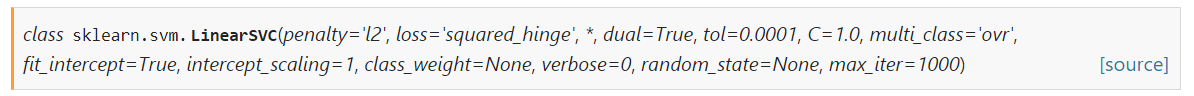

In [ ]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
LinearSupport = LinearSVC()
LinearSupport.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=LinearSupport, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Linear Support Vector Classifier on Iris Dataset')
plt.show()


<a id="2.9"></a><br>
# 9. Gradient Boosting Classifier

* Gradient boosting is one of the most powerful techniques for building **predictive models**.
* The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
* A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
* Gradient boosting is a **greedy algorithm** and can overfit a training dataset quickly.
* GB builds an additive model in a forward stage-wise fashion.

<img src="https://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png">

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
gboost=GradientBoostingClassifier()
gboost.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=gboost, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random Forest Classifier on Iris Dataset')
plt.show()


<a id="100"></a><br>
# Conclusion

### If you have any question or suggestion, I will be happy to hear it.
### Upvote the Kernel if you found it helpful.
<a id="1000"></a>
# [**Goto Top of the Notebook**](#000)